In [22]:
import pandas as pd
from pyproj import Proj
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [4]:
df = pd.read_csv("bronx_baseline_with_tree_count.csv", low_memory = False)
df.head()

,xcoord,ycoord,latitude,longitude,sale price,price per sqft,zip code,tree_count_quarter_mile
0,1008534.0,237641.0,40.818912,-73.912264,0,NaN,10455,396.0
1,1008900.0,238176.0,40.820379,-73.910940,190000,NaN,10456,277.0
2,1008458.0,238121.0,40.820230,-73.912537,217000,NaN,10451,307.0
3,1008458.0,238121.0,40.820230,-73.912537,290000,NaN,10451,307.0
4,1008458.0,238121.0,40.820230,-73.912537,184000,NaN,10451,307.0


In [13]:
df.isnull().sum()

xcoord                     4178
ycoord                     4178
latitude                   4178
longitude                  4178
sale price                    0
price per sqft             2487
zip code                      0
tree_count_quarter_mile    4178
dtype: int64

In [12]:
df_clean = df.dropna(how = 'any', axis = 0, subset = ['tree_count_quarter_mile'])
df_clean.shape

(605, 8)

Coefficients: 
 [-254.24752651]
Mean squared error: 68081322512.92
Variance score: 0.03


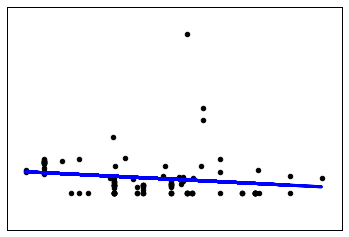

In [23]:
# Use only one feature
X = df_clean['tree_count_quarter_mile']
y = df_clean['sale price']


# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = X_train.reshape((X_train.shape[0],1))
X_test = X_test.reshape((X_test.shape[0],1))
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, regr.predict(X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()